## 1. Load the dataset

In [29]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
print (iris_dataset.DESCR)


Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [30]:
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [31]:
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [32]:
iris_dataset['data'].shape

(150, 4)

get First elements 

In [33]:
iris_dataset['data'][:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [34]:
iris_dataset['target'].shape

(150,)

In [35]:
iris_dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## 2. Split into training and test dataset
Split input and target data to Training data and  Testing data. train_test_split funtion, extracts 75% of the rows in input data as training data set,along with corresponding labels for the data. Remaining 25% of the data and label will mark as test.                                                                                                      
Where X is the full data with label and y is the data used for prediction or target data in binary form


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test =train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0)



In [37]:
X_train.shape

(112, 4)

In [38]:
X_test.shape

(38, 4)

In [39]:
y_train.shape

(112,)

In [40]:
y_test.shape

(38,)

# Histogram with features diagonaly. The data points are colored according to the species the iris belongs to.

/Users/boneyjose/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead


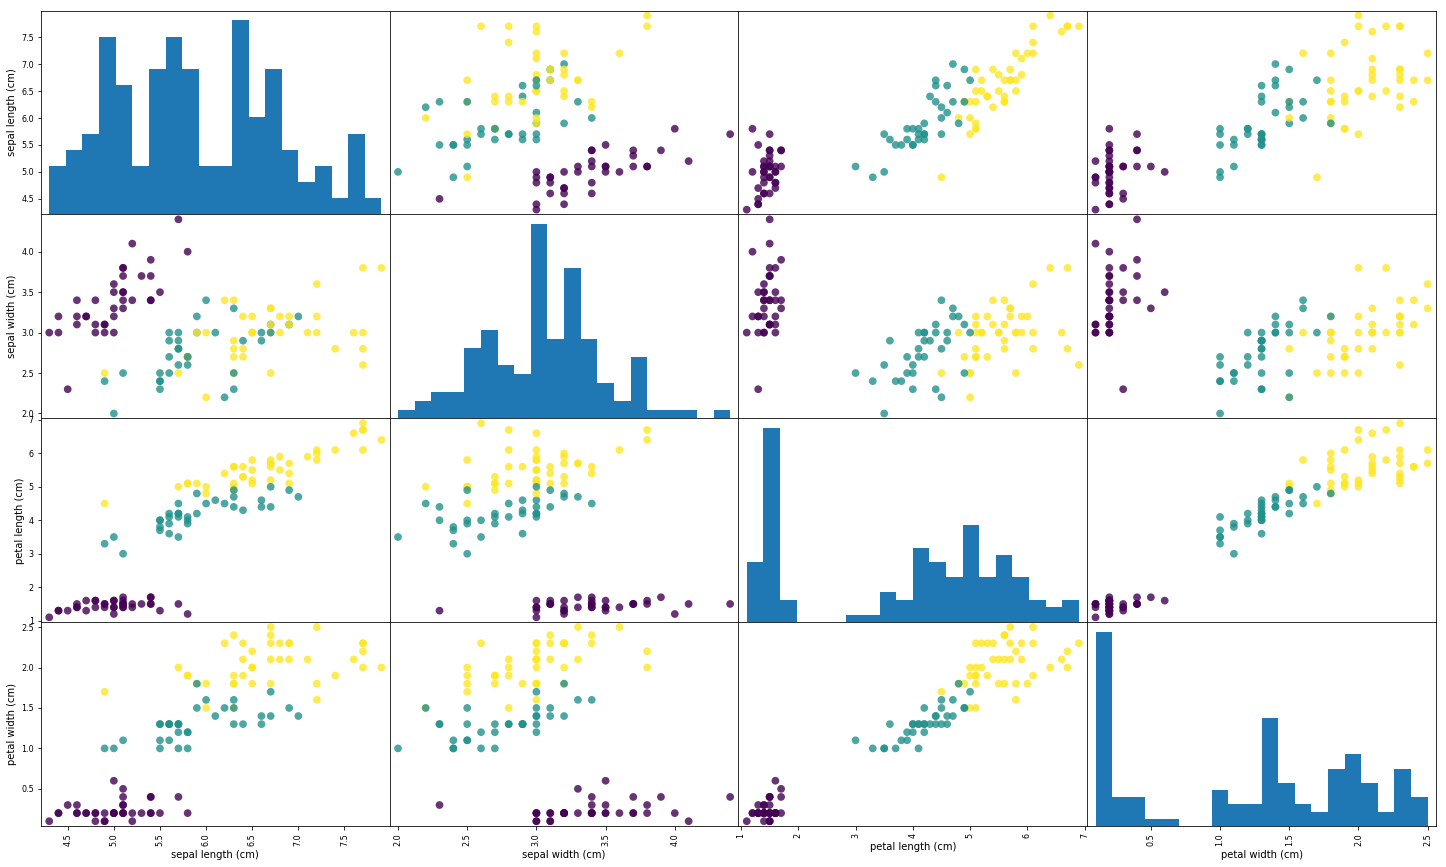

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
iris_dataframe=pd.DataFrame(X_train,columns=iris_dataset.feature_names)
#create a scatter matrix from the datafrom color by y_train
pltr=pd.scatter_matrix(iris_dataframe,c=y_train,figsize=(25,15), marker='o' , hist_kwds={'bins': 20},s=60, alpha=.8)
plt.show()

# 3. Choose estimator

In [42]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=1)

# 4. Build a model from Training data

In [43]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

# Making Prediction on unknow data

In [44]:
import numpy as np
X_new = np.array([[5, 2.9, 1, 0.2]])
X_new

array([[ 5. ,  2.9,  1. ,  0.2]])

In [45]:
prediction = knn.predict(X_new)
prediction

array([0])

In [46]:
iris_dataset['target_names'][prediction]

array(['setosa'],
      dtype='<U10')

# Evaluating the Model

Input known test data set to the model and see how it preidicts.

In [47]:
y_pred = knn.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0,
       0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

Prediction accuracy manually using comparing prediction values aginst the training target lables and take a mean average

In [48]:
np.mean(y_pred == y_test)

0.97368421052631582

Predicting accuracy using API

In [49]:
knn.score(X_test, y_test)

0.97368421052631582